# Project-2 ---> K-means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Importing Dataset

In [2]:
ds=pd.read_csv('Mall_Customers.csv')

# Display top 5 rows of dataset

In [3]:
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Getting information about the dataset

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
ds.shape

(200, 5)

# Preprocessing the dataset

In [6]:
ds.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
ds=ds.dropna()

In [8]:
ds['CustomerID']=ds['CustomerID'].astype(str)

In [9]:
x=ds.iloc[:,3:5].values

In [10]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Using Elbow method to find the no of optimal clusters (value of k)

In [11]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Visualization

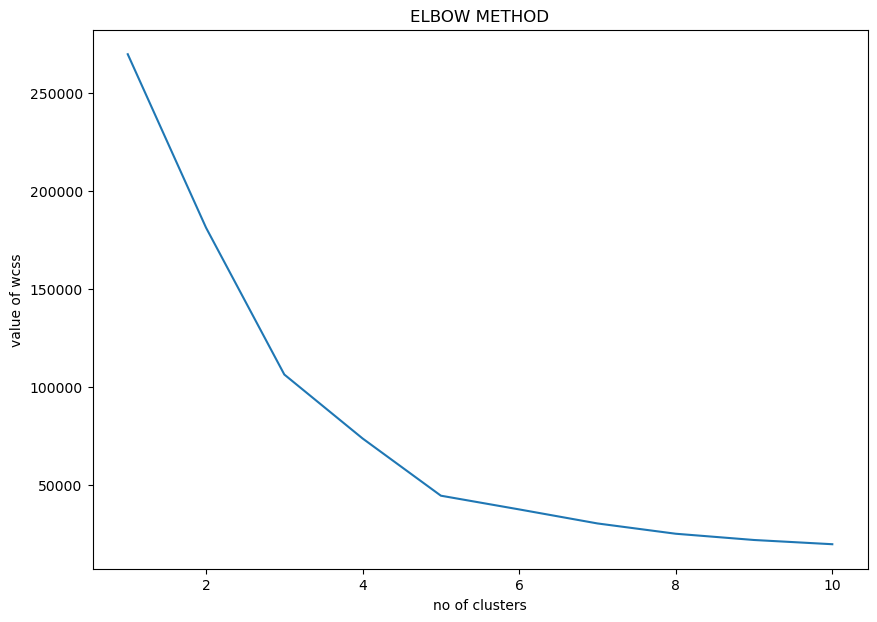

In [12]:
plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title('ELBOW METHOD')
plt.xlabel('no of clusters')
plt.ylabel('value of wcss')
plt.show()

In [13]:
kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=101)
y_pred=kmeans.fit_predict(x)

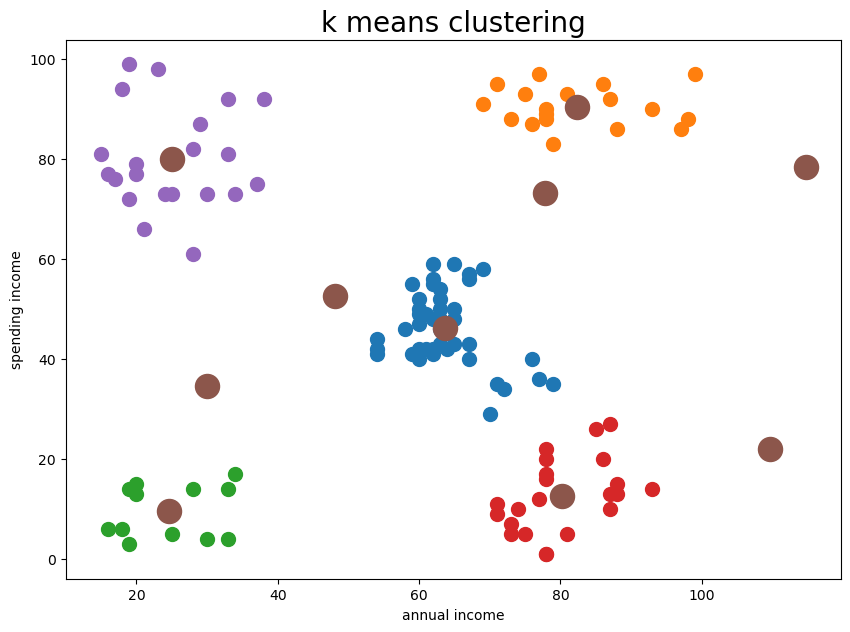

In [14]:
plt.figure(figsize=(10,7))
plt.scatter(x[y_pred==0,0],x[y_pred==0,1],s=100)
plt.scatter(x[y_pred==1,0],x[y_pred==1,1],s=100)
plt.scatter(x[y_pred==2,0],x[y_pred==2,1],s=100)
plt.scatter(x[y_pred==3,0],x[y_pred==3,1],s=100)
plt.scatter(x[y_pred==4,0],x[y_pred==4,1],s=100)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)

plt.title('k means clustering',fontsize=20)
plt.xlabel('annual income')
plt.ylabel('spending income')
plt.show()
